In [1]:
    for (i in 1:16) {
     for (j in 1:16){
         if(j!=i){
             AA=i+j;
         }
     }
 }
AA

[1] 31

### Markdown syntax
**Le contenu de ma première puce**
*Le contenu de ma première puce*
* los quatros
    * felice
1. liste numérotée
2. suite
    1. imbriqué
    > Ceci est un texte cité. Vous pouvez répondre
> Ceci est un texte cité. Vous pouvez répondre
> > Une réponse à la citation

Voici un code en C :

    int main()
    {
        printf("Hello world!\n");
        return 0;
    }

La fonction `printf()` permet d'afficher du texte  
Rendez-vous sur le [Site du Zéro](http://www.siteduzero.com) pour tout apprendre à partir de Zéro !
![insérer image](http://uploads.siteduzero.com/files/420001_421000/420263.png)
---------------


![insérer image](./dendogram_trans0.png)


-files xls converted to csv with `sep="\tab"` and text surround =""
-in R, the following commands were used to import the tables into a usable format:
*mtsRibo2=read.csv("../Downloads/biclustering/projet_11_09_2017/Riboseq_2.csv", fill = TRUE, header = TRUE, sep = "\t", dec=",", row.names = 1)
*RIBO2=as.matrix(mtsRibo2)
-PCA applied using prcomp command
-to visualize PCA, it is recommanded to use ggplot2 and ggfortify:
library(ggplot2)
library(ggfortify)
autoplot(prcomp(data))
-However, there was problems installing package Rcpp:
Warning in install.packages :
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/src/contrib/PACKAGES.rds': HTTP status was '404 Not Found' 
-all packages were uninstalled.
-Problem resolved by installing "bindr" package
### Biclustering of mtsRNA2
-Plaid: Only one small cluster was found. It has heart1 and heart2 as cluster columns
-Fabia: I asked for 8 biclusters as there is 8 tissues. Interesting biclusters found are:
bic2(980,liver12, testis12, lung12); bic4(248, lung12,spleen12); liver is present in every bicluster except bic4

### Biclustering of mtsRibo
-Plaid: Only one small cluster was found. It has heart1 and heart2 as cluster columns
-Fabia: I asked for 8 biclusters as there is 8 tissues. Interesting biclusters found are:
bic1(685, brain12, retina12, spleen12, kidney12); bic2(893,testis12,kidnay12,lung12,retina12); bic3(752,kidnay12,heart12,spleen12); bic4(580,restina12); bic5(1359,liver12,spleen12,heart12,testis12); bic6(1178,liver12,kidney12); bic7(990,heart12,liver12); bic8(434,Lung12,Brain12)



### Translation efficiency:
-trans_eff=ratio between mtsRibo2 and mtsRNA2
-8726 lines all-NAN values in trans_eff
-29611 lines with at list one NAN value
-trans_eff_1=trans_eff with 29611 discarded
-From http://www.ensembl.org/biomart/martview/4938f93aa53103f925bc61d4a0241ce4 the mart_export csv file was donwloaded
-the following script:
for i in {1..17778}; do g=`sed "${i}q;d" gene_list.txt`;h=`echo $g | cut -d"." -f1`; if grep -Fxq $h mart_export.txt;then echo $g >> export_list.txt; fi; done
was used to construct a new gene list containing only protein coding genes
-trans_eff_1 went from 17778 lines to 14683 (trans_eff_2)
-trans_eff_3=as.matrix(log2(trans_eff_2))
-Inf was found in trans_eff_3, because non treated as NAN, and -Inf was found because of 0
-trans_eff_3=lines containing Inf was deleted, log2 was dropped. 13225 lines
-fabia(trans_eff_3,8,0.000001,2000):bic1(216, testis12, liver12, lung12); bic2(288,heart12,liver12,lung12,retina1,spleen12); bic3(257,testis12,brain12,heart12,spleen,retina2); bic4(194,lung12,heart12,brain12,liver12,kidney,spleen); bic5(178,spleen12,lung12,testis12); bic6(184,lung12,heart12,brain12); bic7(154,brain12,retina12,lung12,spleen); bic8(89,Liver12,Brain12,spleen2)
-plaid->biclust(as.matrix(trans_eff_3), method=BCPlaid(),shuffle=70, iter.startup=10, iter.layer=200, back.fit=20, max.layers=100: No biclusters have been found!



**biclustering with different parameters(tests on RNAseq data)**  
* shuffle=3, iter.startup=5, iter.layer=10, back.fit=0, max.layers=20)
1. shuffle=7, iter.startup=10, iter.layer=20, back.fit=5, max.layers=50)
2. shuffle=70, iter.startup=10, iter.layer=200, back.fit=20, max.layers=100)
3. shuffle = 1, iter.startup = 2, iter.layer = 2, back.fit = 1, max.layers = 10)
-> same results
* fabia(mtsRNA2,8,0.01,500)
1. fabia(mtsRNA2,1,0.01,500):1345*testis12 different from the single bicluster found by plaid
2. fabia(mtsRNA2,8,0.01,1000): each bicluster hold the two replicates of a given tissue except Lung
3. fabia(mtsRibo2,8,0.001,2000): bic1(593, spleen12, liver12); bic2(503,spleens2,kidnay12,heart2,retina12); bic3(456,kidnay12,heart12,spleen12); bic4(546,restina12, liver12, lung12); bic5(546,liver12,lung12,spleen2,brain12,kidney12); bic6(212,heart12,kidney12,lung12,spleen); bic7(524,heart12,liver12); bic8(400,kidney12,liver12,spleen)
4. fabia(mtsRibo2,8,0.000001,2000): bic1(339, spleen12, brain12); bic2(456,spleen,kidnay12,heart12,liver12); bic3(316,testis12,brain12,liver12,spleen); bic4(145,lung12, brain12, heart); bic5(401,lung12,spleen2,testis12,kidney12); bic6(353,lung12,liver12,spleen2); bic7(220,heart12,brain12); bic8(401,kidney12,liver12,brain12,retina12)





**count data**
-dowloading RNAseq 
-the 5 most highly expressed genes were identified:
ENSMUSG00000024653.2        4587271                3            lung2		also highly expressed in lung1
ENSMUSG00000064351.1        (3850786,4005439)	(4,5)		(heart1,2)	highly expressed in all tissues	
ENSMUSG00000029368.10       (4895015,4914001)   (1,2)		(liver1,2)	
ENSMUSG00000064341.1        2405528		6		heart1		also highly expreesed in heart2
ENSMUSG00000030324.8        2367165		7		retina1		highly expressed in all tissues




**shell scripts**
    n=`wc -l gene_list.txt`
    for i in 1..$n
    do
    g=`sed "$iq;d" gene_list.txt`
    h=`echo $g | cut -d"." -f1` 
    if grep -Fxq $h mart_export.txt
    then
    echo $g >> export_list.txt
    fi
    done

        for i in {1..17778}; do g=`sed "${i}q;d" gene_list.txt`;h=`echo $g | cut -d"." -f1`; if grep -Fxq $h mart_export.txt;then 
        echo $g >> export_list.txt; fi; done
  

In [2]:
library("fabia")

Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min

Welcome to Bioconductor

    Vignettes contain intro

## Todo:
* translation efficiency by biclustering the ratio matrix between rnaseq and riboseq data
* redo biclustering but tuning the parameters. biclustering with a third method
* verify if some genes are present in multiple biclusters (vendiagram)
* **install jupiter(inline plot)**
* **hclustering of the data without liver**
* **clustering the genes**
* **find a simpler ontology tool, find another implimentation of plaid**
* redo the hierarchical clustering without the outliers genes
* find another way for (hclust2) vizulizing the results
* gene ontology on the small biclusters found by CC
* find good
* See if fabia results contain overlaps

### Hierarchical clustering of the data without liver###
This was done using three methods for hclust: "complete", "single", "median" and "average"


,Brain,Brain2,Heart,Heart2,Kidney,Kidney2,Lung,Lung2,Retina,Retina2,Spleen,Spleen2,Testis,Testis2
ENSMUSG00000000001.4,9.2945228,8.02596622,13.43198196,14.658343,33.2856397,26.3818456,29.69493733,32.07581153,9.03960494,9.6971576,29.138383,31.8844234,33.31916004,35.09661386
ENSMUSG00000000003.15,0.0000000,0.00000000,0.00000000,0.000000,0.0000000,0.0000000,0.00000000,0.00000000,0.00000000,0.0000000,0.000000,0.0000000,0.00000000,0.00000000
ENSMUSG00000000028.14,0.6185582,0.46105556,3.53875435,3.900264,0.8917868,0.7117234,0.81717506,1.06230065,1.08153412,1.2021697,11.803548,19.6700405,14.26582290,14.25651024
ENSMUSG00000000031.15,0.0000000,0.00000000,0.03916821,0.000000,0.0000000,0.0000000,0.01269925,0.00000000,0.00000000,0.0000000,0.000000,0.0144244,0.02908946,0.01526352
ENSMUSG00000000037.16,0.1956604,0.08721784,1.53149221,2.646838,0.1155223,0.1074922,0.09485894,0.09851712,0.06137811,0.1009441,1.407360,0.2154905,13.76962672,10.48357602
ENSMUSG00000000049.11,5.9292651,6.38395021,6.97162144,12.375988,1.7183271,1.8830814,1.57242607,1.49443804,0.07630742,0.1785091,1.699329,1.3023176,3.21729443,3.59612567


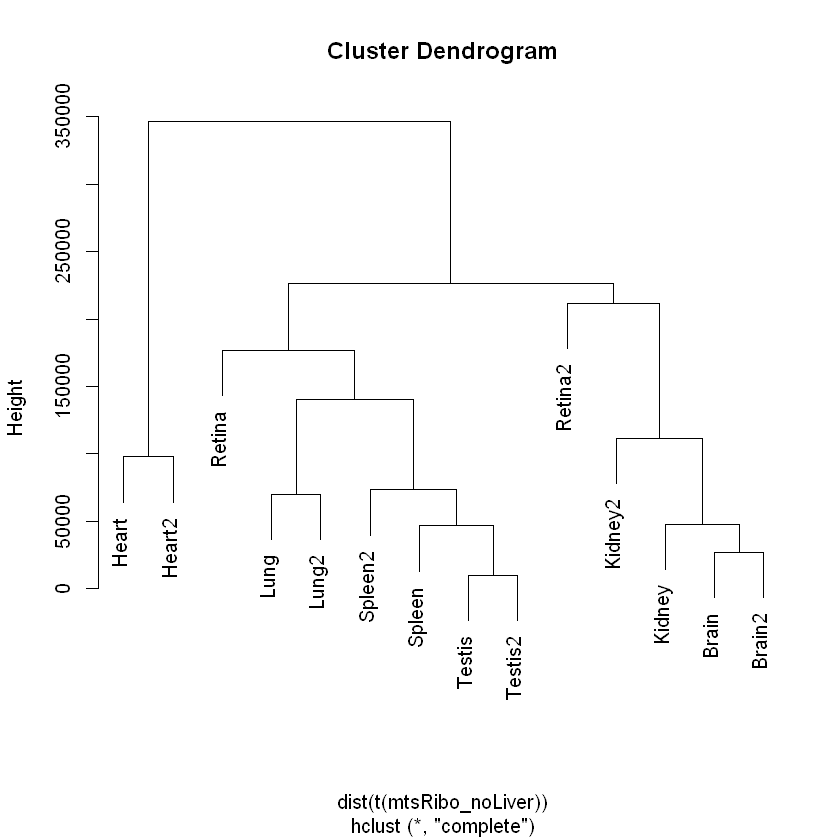

In [3]:
mtsRibo=read.csv("C:/Users/machat/Downloads/biclustering/projet_11_09_2017/Riboseq_2.csv", fill = TRUE, header = TRUE, sep = "\t", dec=",", row.names = 1)
colnames(mtsRibo)=c("Brain",   "Brain2",  "Heart"  , "Heart2" , "Kidney",  "Kidney2", "Liver"  , "Liver2",  "Lung",   
"Lung2" ,  "Retina" , "Retina2", "Spleen",  "Spleen2", "Testis",  "Testis2")
mtsRibo_noLiver=mtsRibo[,-c(7,8)]
head(mtsRibo_noLiver)
plot(hclust(dist(t(mtsRibo_noLiver))))

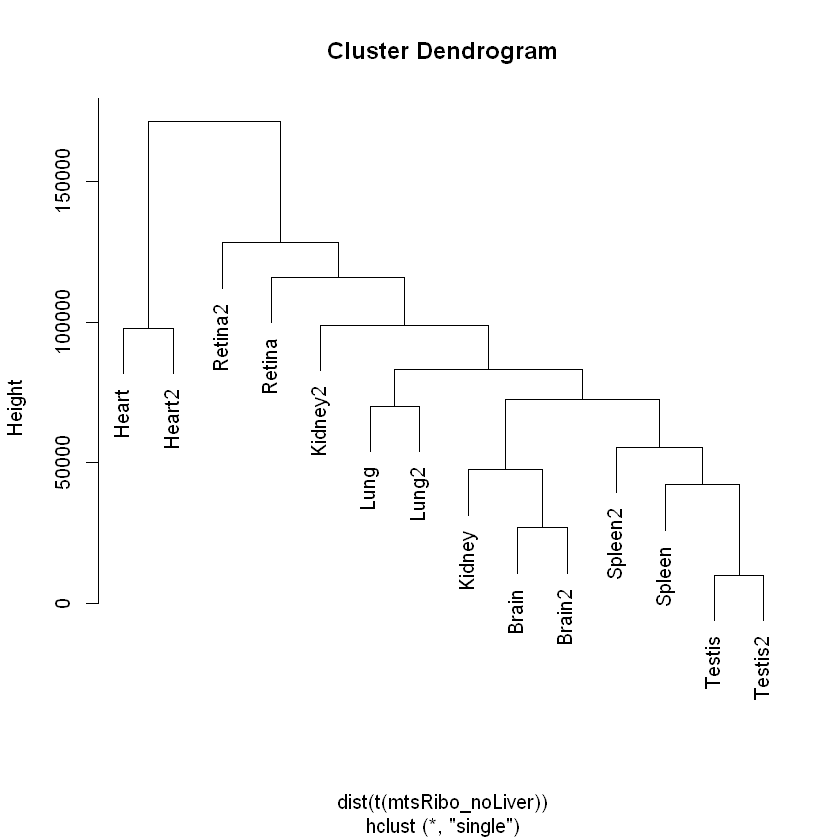

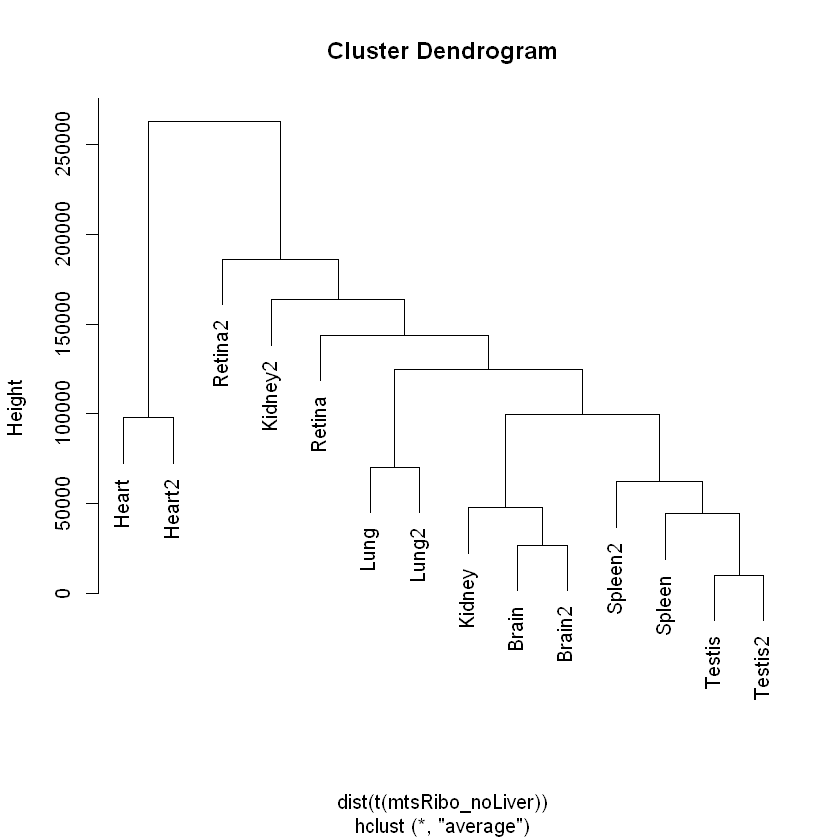

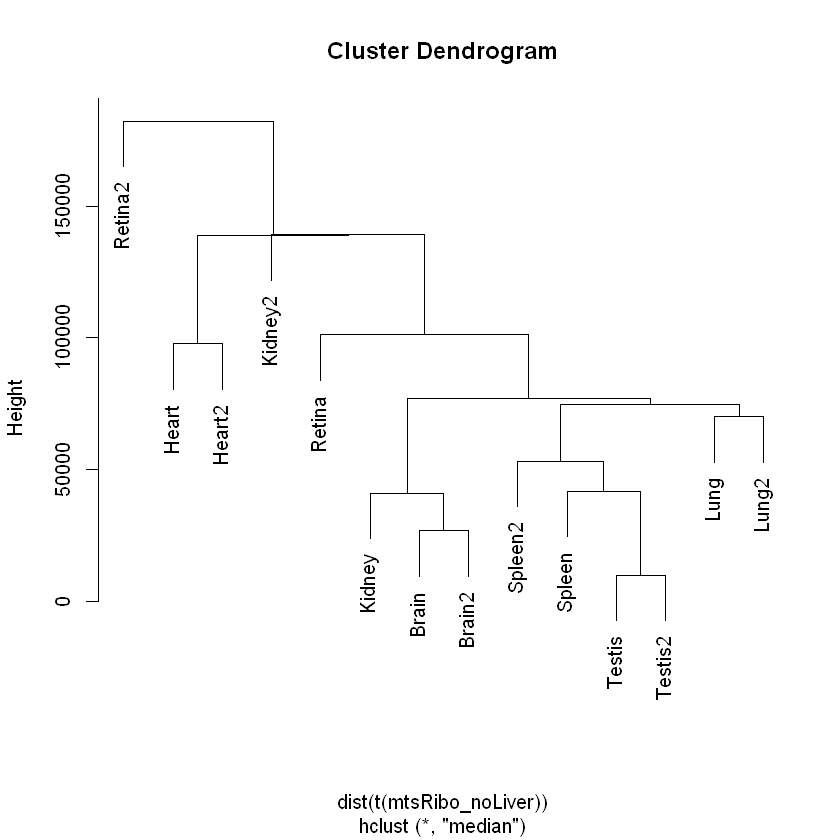

In [4]:
plot(hclust(dist(t(mtsRibo_noLiver)), "single"))
plot(hclust(dist(t(mtsRibo_noLiver)), "average"))
plot(hclust(dist(t(mtsRibo_noLiver)), "median"))

### Clustering of the genes

Loading RNAseq data

In [5]:
mtsRNA=read.csv("C:/Users/machat/Downloads/biclustering/projet_11_09_2017/RNAseq.csv", fill = TRUE, header = TRUE, sep = "\t", dec=",", row.names = 1)
colnames(mtsRNA)=c("Brain",   "Brain2",  "Heart"  , "Heart2" , "Kidney",  "Kidney2", "Liver"  , "Liver2",  "Lung",   
"Lung2" ,  "Retina" , "Retina2", "Spleen",  "Spleen2", "Testis",  "Testis2")
head(mtsRNA)

,Brain,Brain2,Heart,Heart2,Kidney,Kidney2,Liver,Liver2,Lung,Lung2,Retina,Retina2,Spleen,Spleen2,Testis,Testis2
ENSMUSG00000000001.4,8.09801230,7.32051745,9.1789175,8.46749018,21.68309842,24.57931306,2.781871e+01,3.171646e+01,13.6382750,12.15910396,6.2579235,6.35235857,23.55528833,23.22299654,19.0852210,18.0815283
ENSMUSG00000000003.15,0.00000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.000000e+00,0.000000e+00,0.0000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.0000000,0.0000000
ENSMUSG00000000028.14,0.66093398,0.61920186,1.6073922,1.53425029,0.97412546,0.64682541,1.080565e+00,5.747366e-01,0.7969603,0.86777559,1.2127688,1.26010449,4.36086074,5.76094502,12.5369959,12.3236008
ENSMUSG00000000031.15,0.12141473,0.04123997,9.4570249,10.56240562,0.07493470,0.02287683,3.755098e+00,3.700681e+00,0.4216150,0.45442679,0.0593379,0.08758354,0.02778134,0.02437997,0.5425899,0.5130194
ENSMUSG00000000037.16,0.06438051,0.03194573,0.1041500,0.05276982,0.01382064,0.05063168,2.017207e-02,1.449638e-02,0.0404674,0.04508538,0.1641605,0.13097464,0.08838682,0.09197465,4.0206747,3.1375303
ENSMUSG00000000049.11,0.19575027,0.42552919,0.1339479,0.06150496,0.35438507,0.31473543,1.664199e+03,1.986075e+03,0.2108602,0.08084384,0.1247217,0.10380557,0.02986022,0.01715192,13.1537976,17.1405940


#### Constructing the translational efficiency matrix trans_eff
All zeros in mtsRNA become ones -> mtsRNA1 

In [6]:
mtsRNA1=mtsRNA; for(i in dim(mtsRNA1)[1]){for(j in dim(mtsRNA1)[2]){if(mtsRNA1[i,j]==0){mtsRNA1[i,j]=1}}}

Ratio trans_eff = mtsRibo / mtsRNA1

In [7]:
trans_eff=mtsRibo/mtsRNA1

### Gene clustering
First we keep the protein-coding genes only. This is done by comparing the gene list with the mouse protein-coding gene list from the MGI website.  
The comparison is performed on the big machine because it is time consuming.\\
* gene list extraction

In [8]:
write(rownames(mtsRNA), "./all_genes.txt")

* Comparison with the file ./mart_export.txt using the following shell script  

        grep -f mart_export.txt Riboseq_2.csv > Riboseq_protcod.csv  
        grep -f mart_export.txt RNAseq.csv > RNAseq_protcod.csv

* number of portein-coding genes  
    wc -l mart_export.txt
        20353 mart_export.txt
    wc -l RNAseq_protcod.csv
        20248 RNAseq_protcod.csv
    wc -l RNAseq_protcod.csv
        47389 RNAseq_protcod.csv




#### Hierarchical clustering
The powerful machine was used to perform the hierarchical clustering
![insérer image](./hclust_RNA.png)
![insérer image](./hclust_Riboprotcod.png)
![insérer image](./hclust_Riboprotcod.png)



## Todo:


* **redo the hierarchical clustering without the outliers genes**
* find another way for visualizing the results of hierarchical clustering
* find a simpler ontology tool, apply it on the small biclusters found by CC
* See if fabia results contain overlaps (venn diagram)
* find another implimentation of plaid

When outliers genes were removed, clustering outputs one cluster again with some outliers.
That is why, removing and reclustering were iteratively done until more than one cluster were found:

In [5]:
i=0;
ribO=mtsRibo_protcod_1;
n=999999;
while (n>dim(mtsRibo_protcod_1)[1]/2){
    clustree=cutree(hclust(dist(ribO),"average"),15);
    none=which(clustree!=1);
    A=ribO;
    ribO=ribO[-none,];
    n=dim(mtsRibo_protcod_1)[1]-length(none);
    i=i+1}


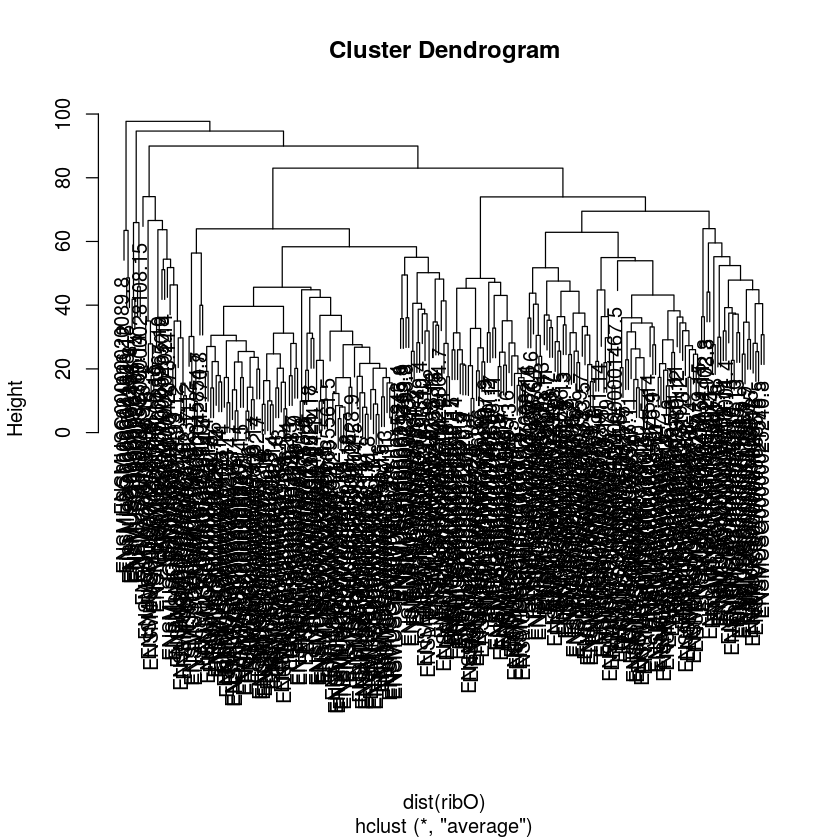

In [7]:
plot(hclust(dist(ribO),"average"))

In [9]:
for (i in 1:dim(A)[1]) rownames(A)[i]=i


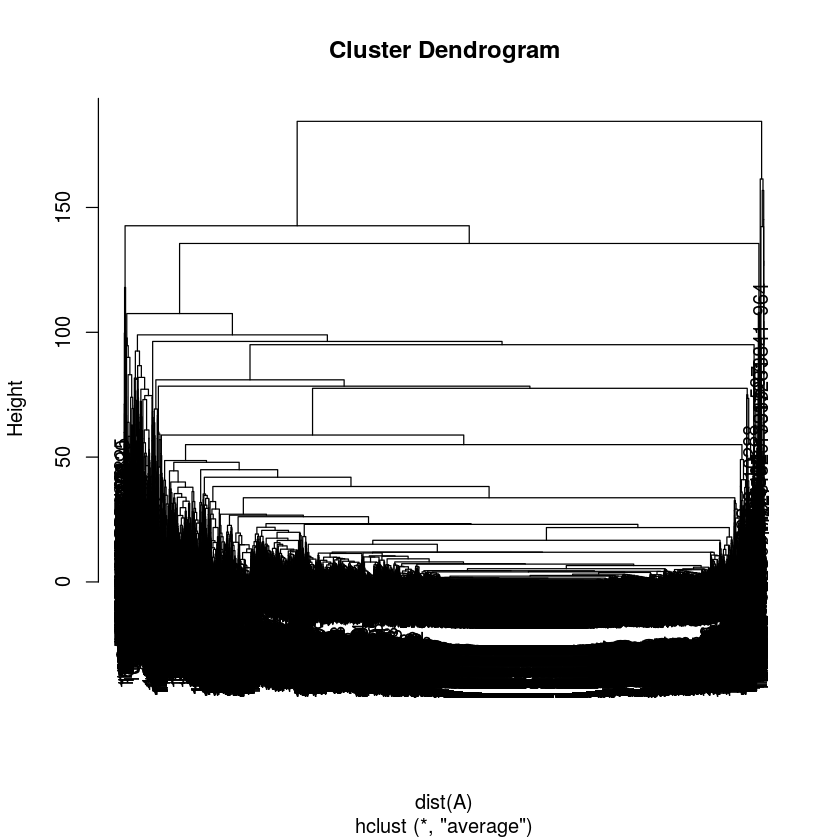

In [11]:
hc_A=hclust(dist(A),"average")
plot(hc_A)

In [58]:
hc_A_cut15=cutree(hc_A,15);
   max(hc_A_cut15)#number of clusters
length(which(hc_A_cut15==2))#number of genes in the second cluster
length(hc_A_cut15)#number of genes


[1] 15

[1] 18468

[1] 18955

In [70]:
i=0;
A=ribO=mtsRibo_protcod_1;
n=999999;
while (n>dim(A)[1]/2){
    clustree=cutree(hclust(dist(ribO),"average"),15);
    hugest_idx=0#hugest cluster index
    hugest_size=0#hugest cluster size
    for (j in 1:15){
        if (hugest_size<length(which(clustree==j))){hugest_size=length(which(clustree==j));hugest_idx=j}
    }
    none=which(clustree!=hugest_idx);
    A=ribO;
    ribO=ribO[-none,];
    n=hugest_size;
    i=i+1
    cat("n=",n," dim(A)[1]=",dim(A)[1],"\n")
}


n= 20213  dim(A)[1]= 20243 
n= 20144  dim(A)[1]= 20213 
n= 20016  dim(A)[1]= 20144 
n= 19732  dim(A)[1]= 20016 
n= 19574  dim(A)[1]= 19732 
n= 18955  dim(A)[1]= 19574 
n= 18468  dim(A)[1]= 18955 
n= 17349  dim(A)[1]= 18468 
n= 15734  dim(A)[1]= 17349 
n= 14270  dim(A)[1]= 15734 
n= 12313  dim(A)[1]= 14270 
n= 10269  dim(A)[1]= 12313 
n= 8745  dim(A)[1]= 10269 
n= 7260  dim(A)[1]= 8745 
n= 6222  dim(A)[1]= 7260 
n= 5097  dim(A)[1]= 6222 
n= 4586  dim(A)[1]= 5097 
n= 4101  dim(A)[1]= 4586 
n= 3767  dim(A)[1]= 4101 
n= 3538  dim(A)[1]= 3767 
n= 3372  dim(A)[1]= 3538 
n= 3182  dim(A)[1]= 3372 
n= 3034  dim(A)[1]= 3182 
n= 2913  dim(A)[1]= 3034 
n= 2764  dim(A)[1]= 2913 
n= 2646  dim(A)[1]= 2764 
n= 2555  dim(A)[1]= 2646 
n= 2374  dim(A)[1]= 2555 
n= 2238  dim(A)[1]= 2374 
n= 2143  dim(A)[1]= 2238 
n= 1887  dim(A)[1]= 2143 
n= 1808  dim(A)[1]= 1887 
n= 1727  dim(A)[1]= 1808 
n= 1644  dim(A)[1]= 1727 
n= 1630  dim(A)[1]= 1644 
n= 1616  dim(A)[1]= 1630 
n= 1602  dim(A)[1]= 1616 
n= 1588  dim(

## step 1644 ##  
is an intersting point because the last time where the number of genes is higher than one in the remaining 14 clusters

In [7]:
i=0;
A=ribO=mtsRNA_protcod;
n=999999;
while (n>dim(A)[1]/2){
    clustree=cutree(hclust(dist(ribO),"average"),15);
    hugest_idx=0#hugest cluster index
    hugest_size=0#hugest cluster size
    for (j in 1:15){
        if (hugest_size<length(which(clustree==j))){hugest_size=length(which(clustree==j));hugest_idx=j}
    }
    none=which(clustree!=hugest_idx);
    A=ribO;
    ribO=ribO[-none,];
    n=hugest_size;
    i=i+1
    cat("n=",n," dim(A)[1]=",dim(A)[1],"\n")
}

n= 20219  dim(A)[1]= 20246 
n= 20156  dim(A)[1]= 20219 
n= 20012  dim(A)[1]= 20156 
n= 19755  dim(A)[1]= 20012 
n= 19306  dim(A)[1]= 19755 
n= 18559  dim(A)[1]= 19306 
n= 17377  dim(A)[1]= 18559 
n= 16615  dim(A)[1]= 17377 
n= 15593  dim(A)[1]= 16615 
n= 13161  dim(A)[1]= 15593 
n= 11824  dim(A)[1]= 13161 
n= 9687  dim(A)[1]= 11824 
n= 8210  dim(A)[1]= 9687 
n= 6660  dim(A)[1]= 8210 
n= 5805  dim(A)[1]= 6660 
n= 4922  dim(A)[1]= 5805 
n= 4505  dim(A)[1]= 4922 
n= 3893  dim(A)[1]= 4505 
n= 3745  dim(A)[1]= 3893 
n= 3242  dim(A)[1]= 3745 
n= 3128  dim(A)[1]= 3242 
n= 2931  dim(A)[1]= 3128 
n= 2657  dim(A)[1]= 2931 
n= 2546  dim(A)[1]= 2657 
n= 2443  dim(A)[1]= 2546 
n= 2190  dim(A)[1]= 2443 
n= 2126  dim(A)[1]= 2190 
n= 2055  dim(A)[1]= 2126 
n= 1866  dim(A)[1]= 2055 
n= 1780  dim(A)[1]= 1866 
n= 1668  dim(A)[1]= 1780 
n= 1471  dim(A)[1]= 1668 
n= 1410  dim(A)[1]= 1471 
n= 1358  dim(A)[1]= 1410 
n= 1344  dim(A)[1]= 1358 
n= 1330  dim(A)[1]= 1344 
n= 1316  dim(A)[1]= 1330 
n= 1302  dim(A)

## Todo:


* redo the hierarchical clustering without the outliers genes
* **find another way for visualizing the results of hierarchical clustering**
* find a simpler ontology tool, apply it on the small biclusters found by CC
* See if fabia results contain overlaps (venn diagram)
* find another implimentation of plaid

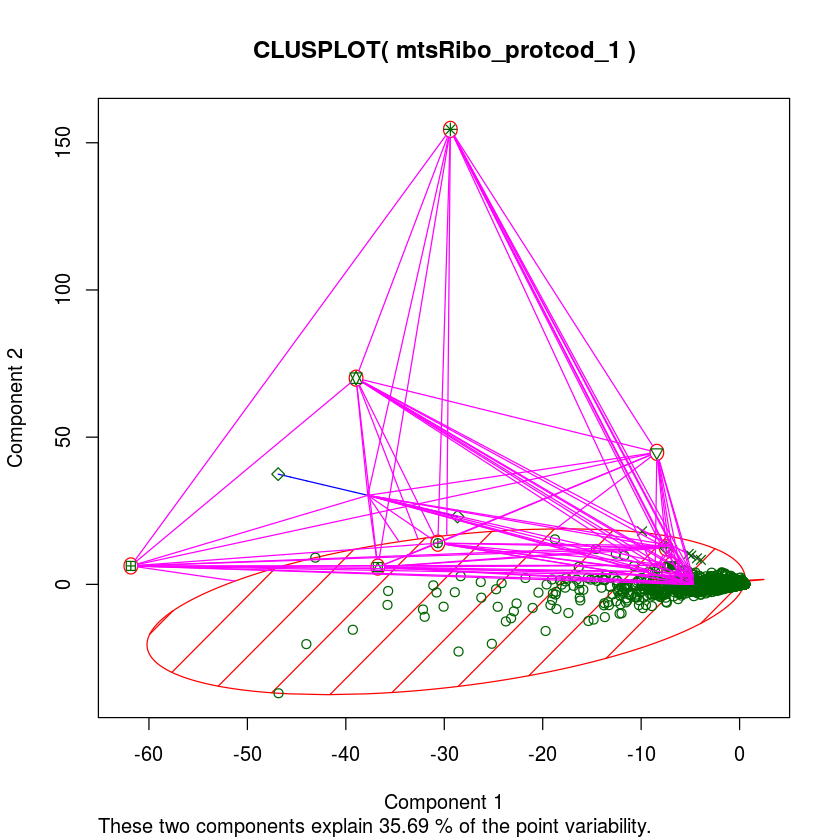

In [73]:
library(cluster)
clusplot(mtsRibo_protcod_1, cutree(hclust(dist(mtsRibo_protcod_1 ),"average"),15), color=TRUE, shade=TRUE)

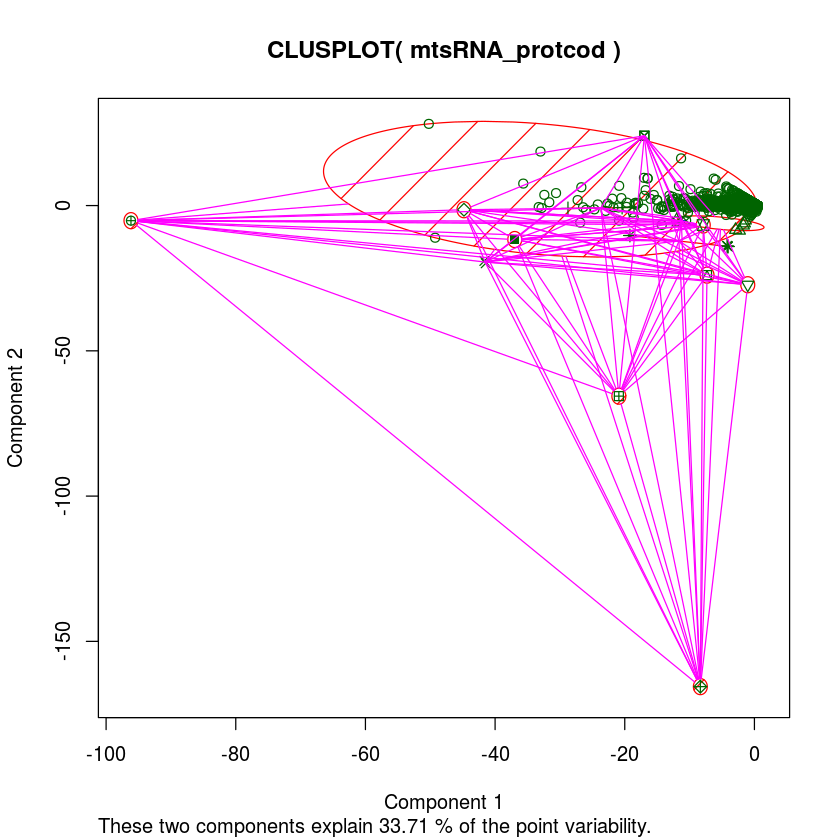

In [8]:
library(cluster)
clusplot(mtsRNA_protcod, cutree(hclust(dist(mtsRNA_protcod),"average"),15), color=TRUE, shade=TRUE)

## Todo:


* redo the hierarchical clustering without the outliers genes
* find another way for visualizing the results of hierarchical clustering
* **find a simpler ontology tool, apply it on the small biclusters found by CC**
* See if fabia results contain overlaps (venn diagram)
* find another implimentation of plaid

In [29]:
#### Gorilla: Gene Ontology enRIchment anaLysis and visuaLizAtion tool ####
Analysis of a gene list (from a cluster) with respect to background list of genes (the whole gene list in the array)  
Choose an ontology:
* Biological process
* Molecular function
* Cellular component      

In [ ]:
7 over 8 of the found biclusters were small

Only 3 over 7 bilcusters gave enrichment terms by Gorilla with p-value threshold of $10^{-4}$

Bicluster 2: 427 12

![inserer une](./GOCOMPONENT_CC-6.png)

Bicluster 6: 129 13
![](./GOrilla_CC-2.png)![](./GOCOMPONENT_CC-2.png)

Bicluster 7:65 12
![](./GOCOMPONENT_CC-1.png)

** Ontology enrichment analysis were then carried with gPROfiler on the same set of biclusters **

The results were similar to Gorilla output:
* one or two terms were found for biclusters for wich Gorilla found nothing.
* almost the same enriched terms were found for biclusters which for Gorilla found something, plus the regulatory motifs term


![](./gprogiler_CC-2_TFBS.png)

## Todo:


* redo the hierarchical clustering without the outliers genes
* find another way for visualizing the results of hierarchical clustering
* find a simpler ontology tool, apply it on the small biclusters found by CC
* **See if fabia results contain overlaps (venn diagram)**
* find another implementation of plaid

In [4]:
mtsRibo_Fabia0_bic1=scan('bic1ribo.txt', what = character())
mtsRibo_Fabia0_bic2=scan('bic2ribo.txt', what = character())
mtsRibo_Fabia0_bic3=scan('bic3ribo.txt', what = character())
mtsRibo_Fabia0_bic4=scan('bic4ribo.txt', what = character())
mtsRibo_Fabia0_bic5=scan('bic5ribo.txt', what = character())
mtsRibo_Fabia0_bic6=scan('bic6ribo.txt', what = character())
mtsRibo_Fabia0_bic7=scan('bic7ribo.txt', what = character())
mtsRibo_Fabia0_bic8=scan('bic8ribo.txt', what = character())
XX=list(vector())
for (i in 1:8) {l=paste("mtsRibo_Fabia0_bic",as.character(i),sep=''); XX[[i]]=eval(as.name(l))}
for (i in 1:7){for (j in (i+1):8){c=intersect(XX[[i]],XX[[j]]); cat(i,"+",j," ",length(c),"\n")}}

1 + 2   146 
1 + 3   230 
1 + 4   190 
1 + 5   68 
1 + 6   111 
1 + 7   151 
1 + 8   172 
2 + 3   371 
2 + 4   342 
2 + 5   397 
2 + 6   388 
2 + 7   279 
2 + 8   163 
3 + 4   190 
3 + 5   265 
3 + 6   511 
3 + 7   381 
3 + 8   165 
4 + 5   276 
4 + 6   79 
4 + 7   114 
4 + 8   340 
5 + 6   699 
5 + 7   701 
5 + 8   149 
6 + 7   489 
6 + 8   53 
7 + 8   85 


In [5]:
Reduce(intersect, XX)

[1] "ENSMUSG00000040632.15" "ENSMUSG00000032343.15" "ENSMUSG00000091898.8"

1.	ENSMUSG00000040632	NRL	neural retina leucine zipper gene [Source:MGI Symbol;Acc:MGI:102567]	ENSG
2.	ENSMUSG00000032343  IMPG1	interphotoreceptor matrix proteoglycan 1 [Source:MGI Symbol;Acc:MGI:1926876]	ENSG
3.	ENSMUSG00000091898	TNNC1	troponin C, cardiac/slow skeletal [Source:MGI Symbol;Acc:MGI:98779]	ENSG

A package for Venn diagrams ('VennDiagram') was found. However, it is difficult to visualize the diagram for more than 5 sets.  
  Another package was then used -upSetR - that was pubished in [nature methods 2014](http://diytranscriptomics.com/Reading/files/upSet_plot.pdf)  

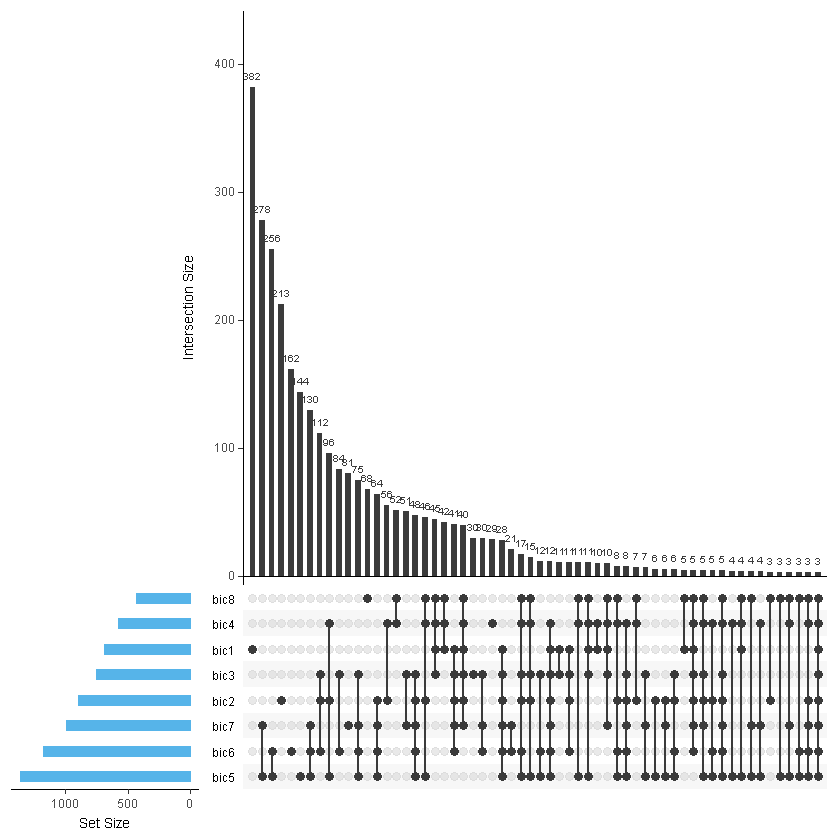

In [19]:
mtsRibo_Fabia0_Allbic=c(mtsRibo_Fabia0_bic1,mtsRibo_Fabia0_bic2,mtsRibo_Fabia0_bic3, mtsRibo_Fabia0_bic4, mtsRibo_Fabia0_bic5, mtsRibo_Fabia0_bic6,mtsRibo_Fabia0_bic7,mtsRibo_Fabia0_bic8)
mtsRibo_Fabia0_All=unique(mtsRibo_Fabia0_Allbic)
Allbic_membership=matrix(nrow=length(mtsRibo_Fabia0_All),ncol=8)
rownames(Allbic_membership)=mtsRibo_Fabia0_All
colnames(Allbic_membership)=c('bic1','bic2','bic3','bic4','bic5','bic6','bic7','bic8')
for(j in 1:dim(Allbic_membership)[2]){l=paste("mtsRibo_Fabia0_bic",as.character(j),sep=''); 
    bic_id=eval(as.name(l));for(i in 1:dim(Allbic_membership)[1])
    {if( is.na(match(rownames(Allbic_membership)[i],bic_id))) 
    {Allbic_membership[i,j]=0} else {Allbic_membership[i,j]=1} }}
library('UpSetR')
upset(as.data.frame(Allbic_membership), nsets=8, sets.bar.color = "#56B4E9",nintersects=7,
      order.by = "freq", empty.intersections = "on")

## Todo:


* redo the hierarchical clustering without the outliers genes
* find another way for visualizing the results of hierarchical clustering
* find a simpler ontology tool, apply it on the small biclusters found by CC
* See if fabia results contain overlaps (venn diagram)
* **find another implementation of plaid**

An interactive biclustering and visualising tool named BiclustGUI. It contains an implementation of Plaid (Is it the same that the one in the 'biclust' packge?). 

In [2]:
mtsRNA_protcod=read.csv("C:/Users/machat/Downloads/biclustering/projet_11_09_2017/RNAseq_protcod.csv", fill = TRUE, header = TRUE, sep = "\t", dec=",", row.names = 1)
mtsRibo_protcod=read.csv("C:/Users/machat/Downloads/biclustering/projet_11_09_2017/Riboseq_protcod.csv", fill = TRUE, header = TRUE, sep = "\t", dec=",", row.names = 1)


In [1]:
library('RcmdrPlugin.BiclustGUI')

Loading required package: biclust
Loading required package: MASS
Loading required package: grid
Loading required package: colorspace
Loading required package: lattice
Loading required package: fabia
Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, ra

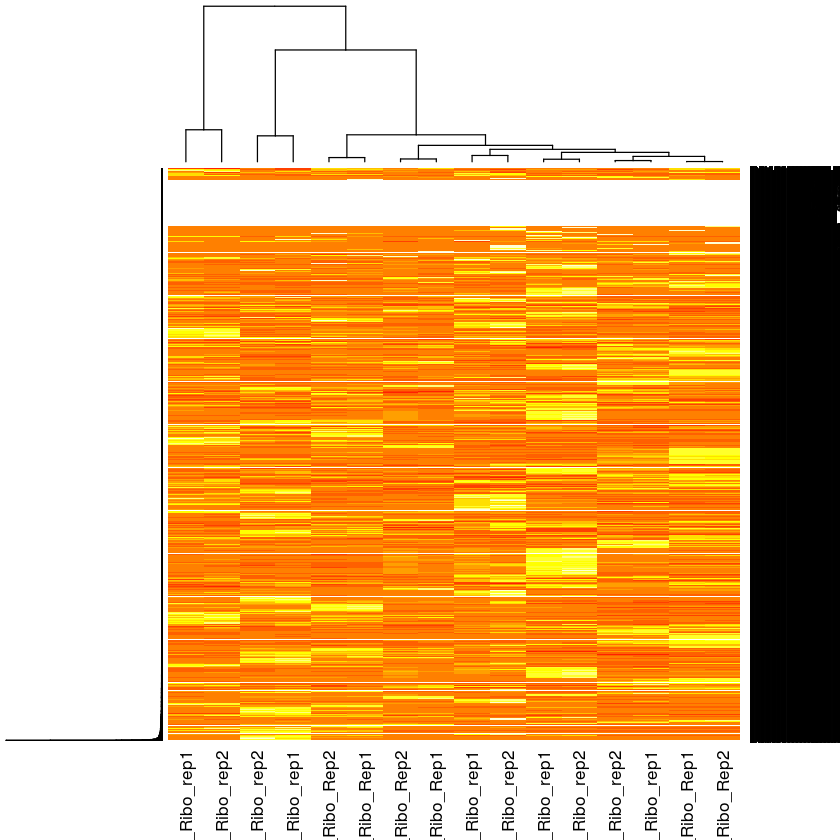

In [5]:
heatmap(as.matrix(mtsRibo_protcod))

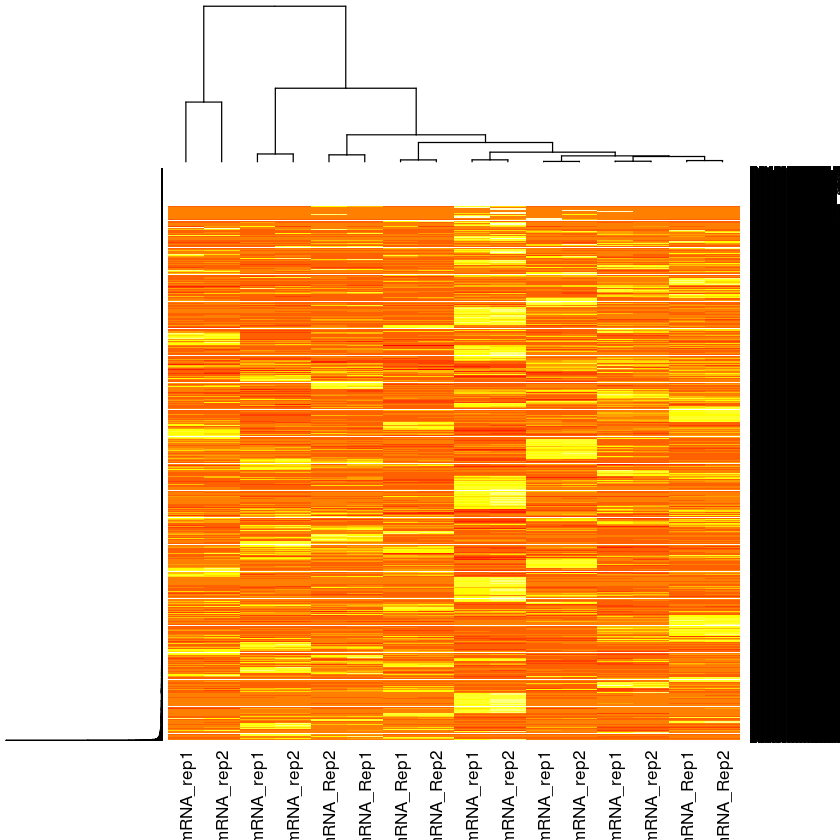

In [6]:
heatmap(as.matrix(mtsRNA_protcod))

In [4]:
Commander()

ERROR: Error in Commander(): could not find function "Commander"


This tool seems unstable. Many biclustering algorithms results in a bug when launched from this tool. 

In [25]:
library('biclust')

Loading required package: MASS
Loading required package: grid
Loading required package: colorspace
Loading required package: lattice

Attaching package: 'lattice'

The following object is masked from 'package:UpSetR':

    histogram



In [27]:
mtsRibo_xmotif <- biclust(as.matrix(mtsRibo_protcod), method=BCXmotifs(), ns=16, nd=20, sd=5, alpha=0.01, number=8)


In [28]:
mtsRibo_xmotif


An object of class Biclust 

call:
	biclust(x = as.matrix(mtsRibo_protcod), method = BCXmotifs(), 
	    ns = 16, nd = 20, sd = 5, alpha = 0.01, number = 8)

Number of Clusters found:  8 

First  5  Cluster sizes:
                   BC 1 BC 2 BC 3 BC 4 BC 5
Number of Rows:    2607  309  108  121   80
Number of Columns:    6    6    6    6    6



In [30]:
bicluster(mtsRibo_protcod,mtsRibo_xmotif, number= 1:8)

,Brain_Ribo_Rep1,Brain_Ribo_Rep2,Kidney_Ribo_Rep1,Kidney_Ribo_Rep2,Liver_Ribo_rep1,Liver_Ribo_rep2
ENSMUSG00000000003.15,0,0,0,0,0,0
ENSMUSG00000000183.6,0,0,0,0,0,0
ENSMUSG00000000326.12,0,0,0,0,0,0
ENSMUSG00000000381.10,0,0,0,0,0,0
ENSMUSG00000000701.7,0,0,0,0,0,0
ENSMUSG00000000706.15,0,0,0,0,0,0
ENSMUSG00000001168.16,0,0,0,0,0,0
ENSMUSG00000001566.9,0,0,0,0,0,0
ENSMUSG00000001815.15,0,0,0,0,0,0
ENSMUSG00000001819.4,0,0,0,0,0,0


In [37]:
bicRibo_xmotif=bicluster(mtsRibo_protcod,mtsRibo_xmotif, number= 1:8)

In [38]:
bicRibo_xmotif$Bicluster8


,Brain_Ribo_Rep1,Brain_Ribo_Rep2,Heart_Ribo_Rep2,Liver_Ribo_rep1,Retina_Ribo_rep1,Retina_Ribo_rep2
ENSMUSG00000001656.3,0,0,0,0,0,0
ENSMUSG00000021381.4,0,0,0,0,0,0
ENSMUSG00000022485.3,0,0,0,0,0,0
ENSMUSG00000022824.12,0,0,0,0,0,0
ENSMUSG00000025433.7,0,0,0,0,0,0
ENSMUSG00000030173.15,0,0,0,0,0,0
ENSMUSG00000030361.16,0,0,0,0,0,0
ENSMUSG00000030775.9,0,0,0,0,0,0
ENSMUSG00000031098.17,0,0,0,0,0,0
ENSMUSG00000036231.5,0,0,0,0,0,0


In [39]:
mtsRNA_xmotif <- biclust(as.matrix(mtsRNA_protcod), method=BCXmotifs(), ns=16, nd=20, sd=5, alpha=0.01, number=8)


In [40]:
bicRNA_xmotif=bicluster(mtsRNA_protcod,mtsRNA_xmotif, number= 1:8)

In [42]:
bicRNA_xmotif


,Heart_Ribo_Rep1,Heart_Ribo_Rep2,Kidney_Ribo_Rep1,Kidney_Ribo_Rep2,Liver_Ribo_rep1,Liver_Ribo_rep2
ENSMUSG00000000003.15,0,0,0,0,0,0
ENSMUSG00000000125.5,0,0,0,0,0,0
ENSMUSG00000000182.9,0,0,0,0,0,0
ENSMUSG00000000263.15,0,0,0,0,0,0
ENSMUSG00000000381.10,0,0,0,0,0,0
ENSMUSG00000000394.15,0,0,0,0,0,0
ENSMUSG00000000435.1,0,0,0,0,0,0
ENSMUSG00000000606.15,0,0,0,0,0,0
ENSMUSG00000000617.14,0,0,0,0,0,0
ENSMUSG00000000701.7,0,0,0,0,0,0


In [ ]:

mtsRibo_bimax=biclust(as.matrix(mtsRibo_protcod), method=BCrepBimax(), minr=10, minc=2, number=100, maxc=14)

In [5]:
mtsRibo_protcod

,Brain_Ribo_Rep1,Brain_Ribo_Rep2,Heart_Ribo_Rep1,Heart_Ribo_Rep2,Kidney_Ribo_Rep1,Kidney_Ribo_Rep2,Liver_Ribo_rep1,Liver_Ribo_rep2,Lung_Ribo_rep1,Lung_Ribo_rep2,Retina_Ribo_rep1,Retina_Ribo_rep2,Spleen_Ribo_rep1,Spleen_Ribo_rep2,Testis_Ribo_rep1,Testis_Ribo_rep2
ENSMUSG00000000001.4,9.29452282,8.02596622,13.43198196,14.65834283,3.328564e+01,26.38184556,4.823167e+01,4.385877e+01,29.694937325,32.075811528,9.03960494,9.697157645,2.913838e+01,31.884423441,3.331916e+01,35.09661386
ENSMUSG00000000003.15,0.00000000,0.00000000,0.00000000,0.00000000,0.000000e+00,0.00000000,0.000000e+00,0.000000e+00,0.000000000,0.000000000,0.00000000,0.000000000,0.000000e+00,0.000000000,0.000000e+00,0.00000000
ENSMUSG00000000028.14,0.61855824,0.46105556,3.53875435,3.90026367,8.917868e-01,0.71172344,7.439467e-01,4.425812e-01,0.817175058,1.062300649,1.08153412,1.202169746,1.180355e+01,19.670040502,1.426582e+01,14.25651024
ENSMUSG00000000037.16,0.19566042,0.08721784,1.53149221,2.64683794,1.155223e-01,0.10749217,3.518308e-02,7.420906e-02,0.094858935,0.098517119,0.06137811,0.100944121,1.407360e+00,0.215490487,1.376963e+01,10.48357602
ENSMUSG00000000049.11,5.92926505,6.38395021,6.97162144,12.37598817,1.718327e+00,1.88308142,2.865900e+03,2.427476e+03,1.572426069,1.494438043,0.07630742,0.178509050,1.699329e+00,1.302317585,3.217294e+00,3.59612567
ENSMUSG00000000056.7,7.37409927,7.04889520,20.98222297,17.39769766,1.024886e+01,8.22910154,2.115722e+01,1.594448e+01,4.370419516,4.214347540,8.39718303,8.172277957,7.211041e+00,15.515454205,1.606716e+00,1.62126748
ENSMUSG00000000058.6,4.91307278,4.89961714,13.66802282,12.00358771,1.095425e+01,14.67698553,1.746363e+00,1.853404e+00,57.510920758,59.202538348,3.53643553,4.658857222,1.603474e+00,1.839401524,1.513247e+00,1.59131768
ENSMUSG00000000078.6,7.65960240,7.88803341,10.33728631,9.62190212,5.813332e+00,7.10682205,3.645124e+00,3.256259e+00,32.630893877,33.020248933,2.87279262,2.723814823,7.537875e+00,8.301232316,5.404845e+00,5.06460585
ENSMUSG00000000085.16,1.41216776,1.29606880,1.14893413,1.12520286,6.804845e-01,0.71952617,5.086949e-01,7.061311e-01,1.351764397,1.285040467,1.15695361,1.288946724,6.880369e-01,0.737247297,1.627394e+00,1.63036953
ENSMUSG00000000088.6,150.59697493,156.90489103,875.33385635,754.08971423,4.207716e+02,244.39518068,2.652335e+02,2.908598e+02,46.480572779,49.903917992,107.59968714,91.376172139,1.071008e+02,91.479316946,1.225669e+02,177.58024640


18/10: New tools to try for biclsutering analysis: [BicOverlapper](http://vis.usal.es/bicoverlapper/documents/userGuide.pdf) and [Bicat](http://people.ee.ethz.ch/~sop/bicat/?page=tutorial.php)